In [1]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt

# Read in geometry defined by Nikolai

In [70]:
stacked_spheres = trimesh.load_mesh('../sphere-charging/geometry/stacked_spheres.stl') 
stacked_spheres.apply_scale(1e-3)

<trimesh.Trimesh(vertices.shape=(22044, 3), faces.shape=(48048, 3))>

In [71]:
stacked_spheres.show()

[-9.61651984e-07  8.91095517e-07  1.35715769e-07]


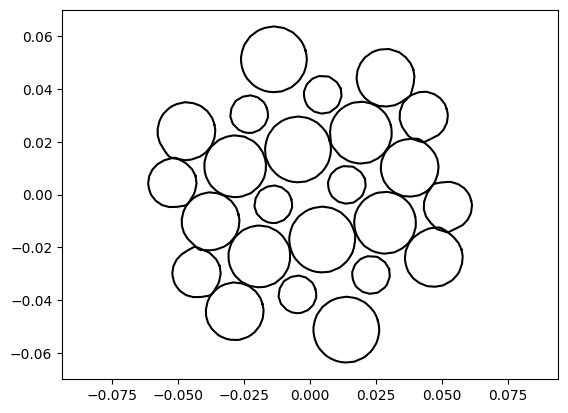

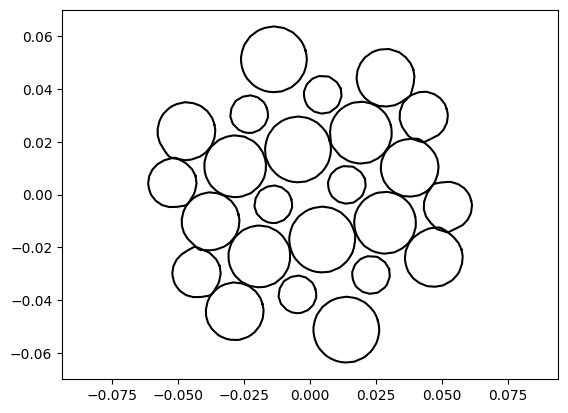

In [82]:
## make 2D slices

meshes = stacked_spheres.split(only_watertight=False)
# the convex hull of every component
meshes_convex = [i.convex_hull for i in meshes if i.vertices.shape[0] > 300]

# combine all components into one mesh
convex_combined = np.sum(meshes_convex)

# get a single cross section of the mesh
section = convex_combined.section(plane_origin=stacked_spheres.centroid, plane_normal=[1, 1, 1])
print(convex_combined.centroid)
slice_2D, to_3D = section.to_2D()

# if we want to intersect a line with this 2D polygon, we can use shapely methods
polygons = slice_2D.polygons_full

slice_2D.show()
plt.figure()
for polygon in polygons:
    x, y = polygon.exterior.xy
    plt.plot(x, y, 'k-')
plt.axis('equal')
plt.show()


In [49]:
import trimesh.exchange.stl

# Get ASCII STL string
ascii_stl_str = trimesh.exchange.stl.export_stl_ascii(mesh=convex_combined)

# Write it to a file
with open("../sphere-charging/geometry/stacked_spheres_edited.stl", "w") as f:
    f.write(ascii_stl_str)

# Define stacked spheres using trimesh

In [2]:
import numpy as np
import trimesh

# Parameters
radius = 100  # microns
n_rows = 4
n_cols = 4
spacing = 2* radius #* np.sqrt(2)  # ≈ 70.71 µm, makes spheres touch along (1,1,0)
z_offset = radius * np.sqrt(2)  # ≈ 86.6 µm for vertical stacking
layers = 5

# Sphere template
sphere_template = trimesh.creation.icosphere(subdivisions=2, radius=radius)
spheres = []

# Generate layers
for k in range(layers):
    z = -k * z_offset  # stacking downward

    if k % 2 == 0:
        # Even layers (A): regular grid
        for i in range(n_rows):
            for j in range(n_cols):
                center = np.array([
                    j * spacing ,
                    -i * spacing ,
                    z
                ])
                sphere = sphere_template.copy()
                sphere.apply_translation(center)
                spheres.append(sphere)
    else:
        # Odd layers (B): offset grid
        for i in range(n_rows - 1):
            for j in range(n_cols - 1):
                center = np.array([
                    j * spacing + spacing / 2,
                    -i * spacing - spacing / 2,
                    z
                ])
                sphere = sphere_template.copy()
                sphere.apply_translation(center)
                spheres.append(sphere)

# Combine all spheres into one mesh
stacked_spheres = trimesh.util.concatenate(spheres)


In [3]:
# Create a scene and add mesh and points
scene = trimesh.Scene()
scene.add_geometry(stacked_spheres)
scene.show()

[ 6.09536465e-19  8.28370049e-17 -3.80412374e-15]


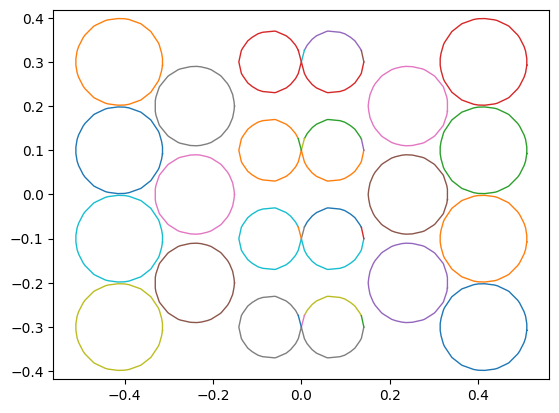

In [4]:
# get a single cross section of the mesh
stacked_spheres.apply_scale(1e-3)
centroid = stacked_spheres.centroid
# Translate the mesh so that the centroid is at (0, 0, 0)
stacked_spheres.apply_translation(-centroid)

# plot section
section = stacked_spheres.section(plane_origin=(300,0,-300), plane_normal=[1, 0, 1])
print(stacked_spheres.centroid)
slice_2D, to_3D = section.to_2D()
slice_2D.show()

In [5]:
import trimesh.exchange.stl

# Get ASCII STL string
ascii_stl_str = trimesh.exchange.stl.export_stl_ascii(mesh=stacked_spheres)

# Write it to a file
with open("../sphere-charging/geometry/stacked_spheres_frompython.stl", "w") as f:
    f.write(ascii_stl_str)


In [27]:
stacked_spheres.is_watertight

True